In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pip install  openpyxl


In [3]:
# Load Excel file
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

# Display first 5 rows
print(df.head())


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

In [4]:
df.to_csv("Airbnb_Open_Data.csv", index=False)
print("File converted to CSV successfully!")


File converted to CSV successfully!


In [5]:
#Read the AIRBNB Data
df=pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [8]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [9]:
#Neighbourhood group was 'brookln' instead of'Brooklyn'
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
#Drop duplicate records
df.drop_duplicates(inplace=True)
#Drop house_rules and license columns with insufficient data
df.drop(columns=[col for col in ['house_rules', 'license'] if col in df.columns], inplace=True)
#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)
#Remove all commas in the price and service fee columns
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)
#Rename the price and sevice fee columns to include a dollar sign
df.rename(columns={
    'price':'$price',
    'service fee':'$service fee'
    },inplace=True)
#Drop all records with missing values
df.dropna(inplace=True)
#Change all mismatched data types to the appropriate once,
df['$price']=df['$price'].astype(float)
df['$service fee']=df['$service fee'].astype(float)
df['id']=df['id'].astype(int)
df['host id']=df['host id'].astype(int)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)
#Correct the spelling of'brookln'to 'Brooklyn'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'
#Get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365']>365].index)


In [11]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,$price,$service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.163500e+04,8.163500e+04,81635.000000,81635.000000,81635.000000,81635.000000,81443.000000,81413.000000,81635.000000,81635.000000,81635,81635.000000,81635.000000,81635.000000,81635.000000
mean,3.004291e+07,4.918454e+10,40.727261,-73.948262,0.497495,2012.491480,626.746227,125.316178,7.449440,31.976334,2019-06-21 23:05:57.155631872,1.389208,3.286544,7.124505,135.038844
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.632794e+07,2.445236e+10,40.687630,-73.982070,0.000000,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,3.120607e+07,4.903261e+10,40.721270,-73.953580,0.000000,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,4.343537e+07,7.384714e+10,40.762485,-73.930460,1.000000,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,1.597561e+07,2.854116e+10,0.056382,0.050622,0.499997,5.760668,331.766290,66.350398,28.384755,51.611969,NaN,1.759669,1.278688,29.868488,128.489020


In [12]:
#What are the different property in the dataset?
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,43128
Private room,36774
Shared room,1623
Hotel room,110


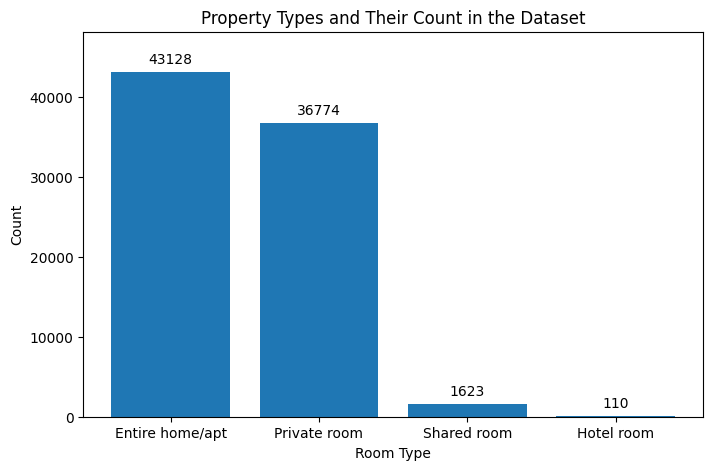

In [32]:
import matplotlib.pyplot as plt

# Count the number of listings by room type
property_types = df['room type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
room_type_bar = plt.bar(property_types.index, property_types.values)

# Add labels on top of bars
plt.bar_label(room_type_bar, labels=property_types.values, padding=4)

# Set limits and labels
plt.ylim([0, property_types.max() + 5000])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property Types and Their Count in the Dataset')

# Show the plot
plt.show()


In [23]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33862
Manhattan,33708
Queens,11005
Bronx,2250
Staten Island,810


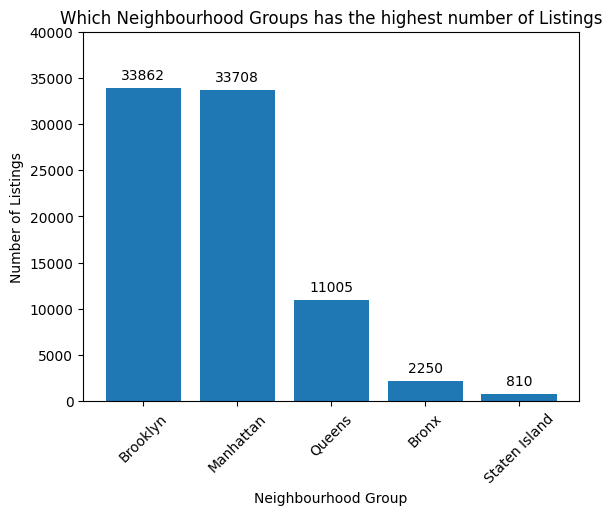

In [24]:
#Whch neighbourhood group has the highest number of listings?
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Groups has the highest number of Listings');

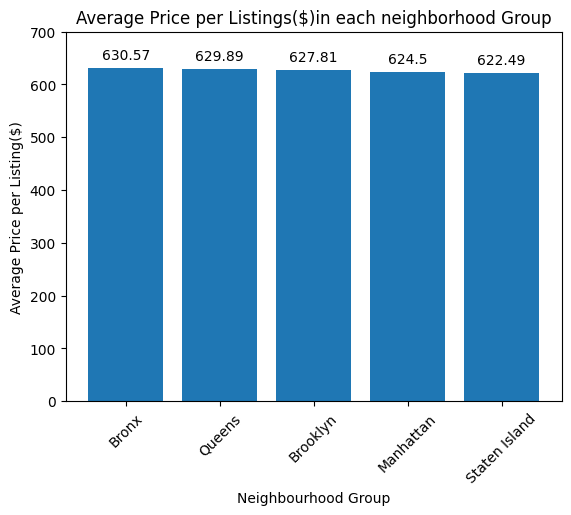

In [25]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price=df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"$price"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"$price"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listing($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings($)in each neighborhood Group');

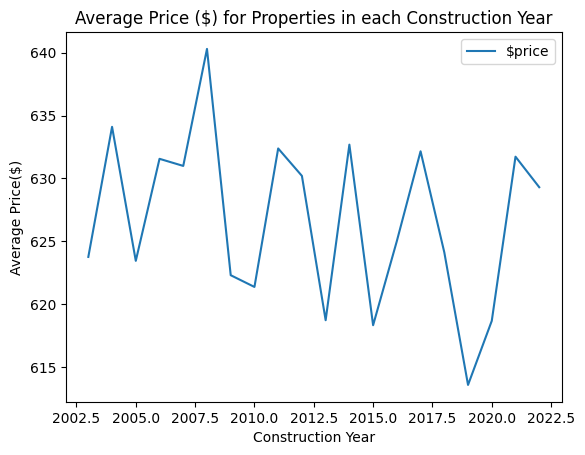

In [26]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['$price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price ($) for Properties in each Construction Year');

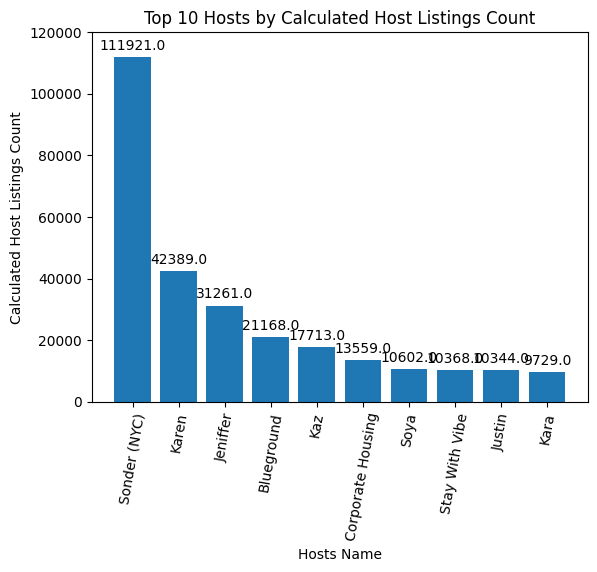

In [31]:
#Who are the top 10 hosts by calculated host listings count?
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,labels=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

In [33]:
#Are hosts with verified identites more likely to receive positive reviews?
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.289735
unconfirmed,3.283351


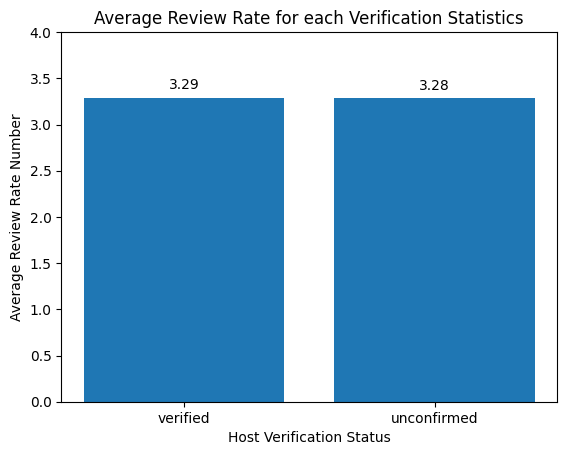

In [34]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

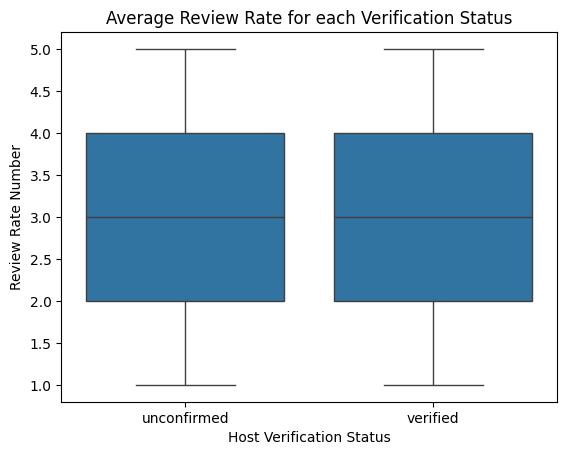

In [35]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [36]:
#Is there a correlation between the price of a listiong and its service fee?
df['$price'].corr(df['$service fee'])

np.float64(0.9999909005366617)

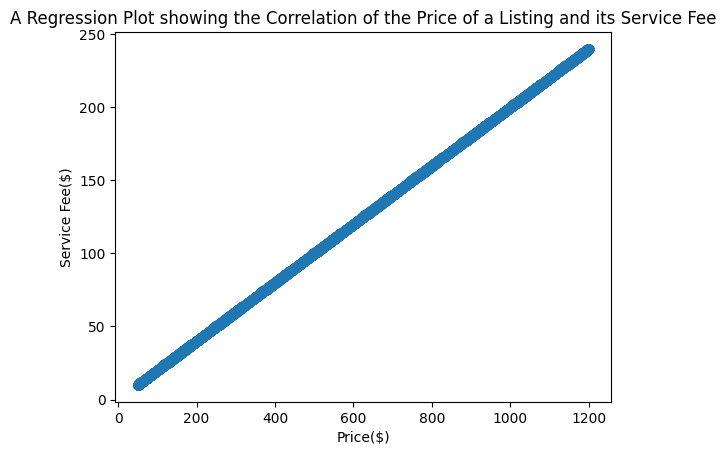

In [37]:
sns.regplot(df,x='$price',y='$service fee');
plt.xlabel('Price($)');
plt.ylabel('Service Fee($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee');

In [38]:
#What is the average review rate number(e.g.,stars)for listings,and does it vary based on the neighborhood group and room type
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.376157
                    Private room               3.322556
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.252236
                    Hotel room                 3.833333
                    Private room               3.283597
                    Shared room                3.326700
Manhattan           Entire home/apt            3.275310
                    Hotel room                 3.500000
                    Private room               3.293485
                    Shared room                3.260000
Queens              Entire home/apt            3.355581
                    Hotel room                 3.750000
                    Private room               3.318433
                    Shared room                3.326087
Staten Island       Entire home/apt            3.327711
                    Private room               3.487113
                    Shared room                3.714286

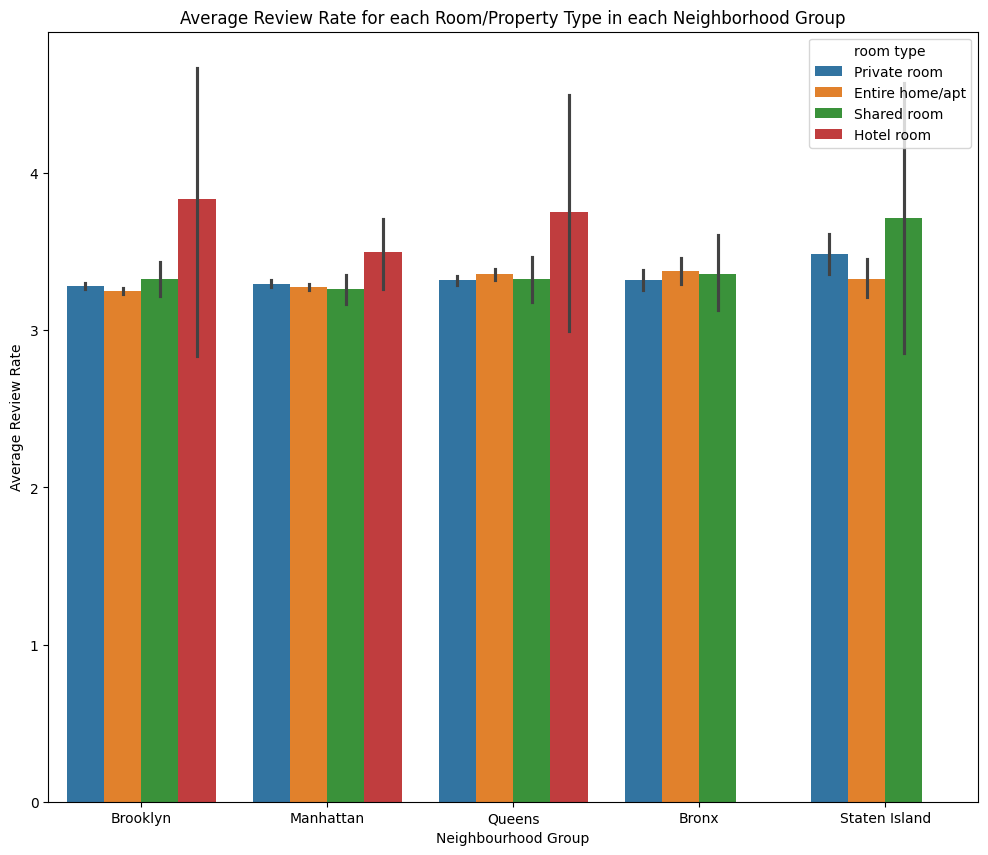

In [39]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighborhood Group');

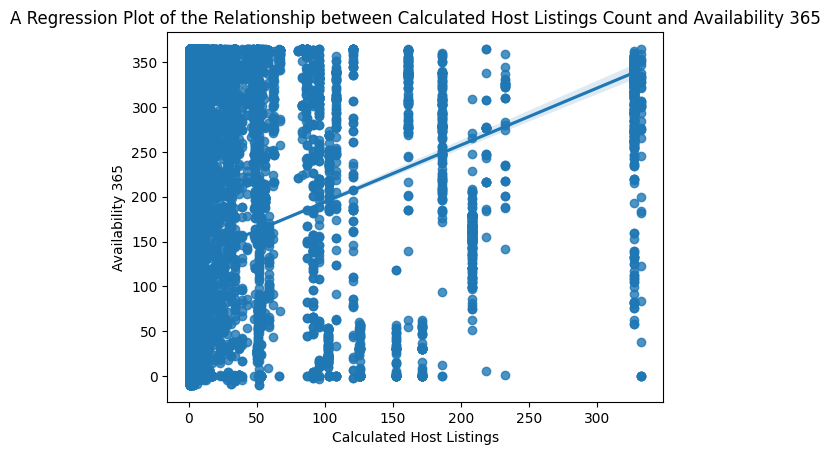

In [40]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [41]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14792824358366247)